<a href="https://colab.research.google.com/github/RmdanJr/vehicle-distance-estimation/blob/main/tutorials/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection


## Cloning Repo

In [3]:
!git clone https://github.com/RmdanJr/vehicle-distance-estimation.git

Cloning into 'vehicle-distance-estimation'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 196 (delta 0), reused 0 (delta 0), pack-reused 195
Receiving objects: 100% (196/196), 44.36 MiB | 15.89 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [4]:
%cd vehicle-distance-estimation/object-detector/

/content/vehicle-distance-estimation/object-detector


## Packages & Setup

In [5]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 4.8 MB/s 
     |████████████████████████████████| 149 kB 62.1 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7873 sha256=7d2ecdb5f797bf35082554d4ba35f015b2cbc69a8a7ce0e6895dbdebe9a67b02
  Stored in directory: /root/.cache/pip/wheels/64/46/53/3a413f321c09b0df8d4a26edd5fc3501c6c1b238497d166638
Successfully built tree
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
!python setup.py

Checking setup...
YOLOv5 🚀 2022-6-9 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/78.2 GB disk)


## FLIR Dataset

### Download Dataset

In [7]:
!bash scripts/download-flir-dataset.sh

Streaming output truncated to the last 5000 lines.
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03450.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03451.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03452.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03453.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03454.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03455.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03456.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03457.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03458.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03459.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03460.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03461.tiff  
  inflating: FLIR_ADAS_1_3/video/thermal_16_bit/FLIR_video_03462.tiff  
  inflating: 

### Format Dataset as YOLOv5 Format


In [8]:
!python format-dataset.py

100% 67618/67618 [01:54<00:00, 590.32it/s]
100% 11682/11682 [00:19<00:00, 613.57it/s]


## Fine-tuning YOLOv5s

### YOLOv5 Model & Dataset Configuration

#### Dataset YAML File

In [9]:
!python create-yaml.py

#### Model's YAML Configuration File


In [10]:
!python configure-yolo-yaml.py

### Training YOLOv5

In [11]:
!python train.py --epochs 2 --data dataset.yaml --cfg yolov5s.yaml

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-6-9 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

## Making Predictions

In [1]:
!gdown --folder 10jpVGSHGILDt85QGf5KwHji0sUjZXbWR

Retrieving folder list
Retrieving folder 1-ySPTPSb0tvFp23eUh0OaYm3nB8eivt8 weights
Processing file 1XGJM9PTQ5WyhH2aMUfPUSKdy7hX2jTPe best.pt
Processing file 1h8jIClN7fhYhu_ZueK1UdJMGsa9KaATk last.pt
Processing file 1NQVmct8vhAp-VMHL5WrgHyrhYFj6qrJz confusion_matrix.png
Processing file 1tc1hgmGj41fnaF8TN-vj4gAyv7ZJZYa0 events.out.tfevents.1649320718.643dfe7de3d8.3864.0
Processing file 1Xhupc9yU7kn0rTY3AG-F0W3YJVGZ_Ba7 F1_curve.png
Processing file 1tPHqHMFFfDxKZqkQCZeP_A5Ox1tTi4oG hyp.yaml
Processing file 1hgp-UHX8lP5pKkvJELc8nXAqp-YrYCGy labels_correlogram.jpg
Processing file 1dq_AUXiB00g3RzNOrUPpsD0Is76bmYZK labels.jpg
Processing file 1K5zbR-FzxbirDktmmWhhLkE5JFT6nVLP opt.yaml
Processing file 1_WVl6N1g_X880M2uSatROUzPSGkluSKj P_curve.png
Processing file 1T0Ir1G3_X5fDXyb3gz1Bwrt3U3T0J6Qa PR_curve.png
Processing file 1w9n90Q7jLSEgrTOssxF79CK7ezozIIQF R_curve.png
Processing file 18lAgXljKtDD_dVZ1dJU6nkDez9hPwA4g results.csv
Processing file 1Uk_T4YDyp7UKfNQyYM2aHm3C608TnYk7 results.png
Pro

In [ ]:
!python detect.py --save-txt --weights training-results/weights/best.pt --conf 0.4 --source 'https://youtu.be/CvI5nvUdbsM'

detect: weights=['training-results/weights/best.pt'], source=https://youtu.be/CvI5nvUdbsM, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-6-8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7018216 parameters, 0 gradients
cv2.imshow() is disabled in Google Colab environments
1/1: https://youtu.be/CvI5nvUdbsM...  Success (661 frames 1280x720 at 24.00 FPS)

0: 384x640 9 cars, Done. (0.408s)
0: 384x640 10 cars, Done. (0.012s)
0: 384x640 10 cars, Done. (0.011s)
0: 384x640 7 cars, Done. (0.010s)
0: 384x640 7 cars, Done. (0.012s)
0: 384x640 7 cars, Done. (0.011s)
0: 384x640 7 cars, Done. (0.0

## Generate Objects Coordinates Sheet



The sheet is expected to have a row for each frame & a column for each category. Each cell must have all center coordinates of detected objects of the column (category) on the row (frame).

In [ ]:
!python generate-coordinates-sheet.py

[0.0542969, 0.561806]
[0.848437, 0.59375]
[0.695312, 0.5625]
[0.884766, 0.622222]
[0.0152344, 0.559722]
[0.238281, 0.547917]
[0.607813, 0.564583]
[0.303906, 0.541667]
[0.160547, 0.559028]
[0.101953, 0.564583]
[0.441406, 0.559722]
[0.175391, 0.552778]
[0.68125, 0.534028]
[0.742969, 0.563889]
[0.084375, 0.554167]
[0.496875, 0.552778]
[0.803125, 0.55625]
[0.823828, 0.560417]
[0.139062, 0.570833]
[0.898047, 0.582639]
[0.710156, 0.502778]
[0.937109, 0.585417]
[0.488672, 0.480556]
[0.416406, 0.549306]
[0.862891, 0.543056]
[0.555469, 0.547917]
[0.0613281, 0.58125]
[0.967969, 0.556944]
[0.943359, 0.55]
[0.307031, 0.490278]
[0.396484, 0.509722]
[0.310547, 0.553472]
[0.29375, 0.554861]
[0.278516, 0.554167]
[0.0640625, 0.55625]
[0.6875, 0.566667]
[0.0207031, 0.570833]
[0.482031, 0.559722]
[0.728906, 0.556944]
[0.747266, 0.553472]
[0.773438, 0.5625]
[0.881641, 0.595833]
[0.488672, 0.48125]
[0.344531, 0.493056]
[0.681641, 0.525]
[0.596094, 0.529167]
[0.025, 0.604167]
[0.323828, 0.713194]
[0.975391,

## Examples

In [ ]:
!python display-examples.py

## Results

(-0.5, 2399.5, 1199.5, -0.5)

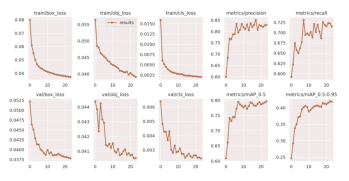

In [2]:
import cv2
import matplotlib.pyplot as plt

# display results image
# imread() reads image as grayscale, second argument is one => grayscale, zero => RGB 
img = cv2.imread('training-results/results.png', 1)
plt.imshow(img)
plt.axis('off')